Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [4]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (918, 12)


In [5]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Display the distribution of the target variable

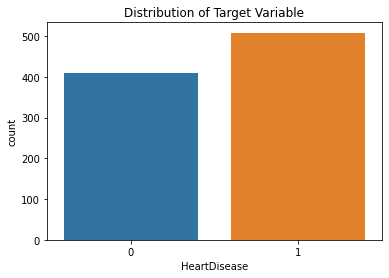

In [7]:
sns.countplot(x='HeartDisease', data=df)
plt.title("Distribution of Target Variable")
plt.show()

# Display the correlation matrix of the features

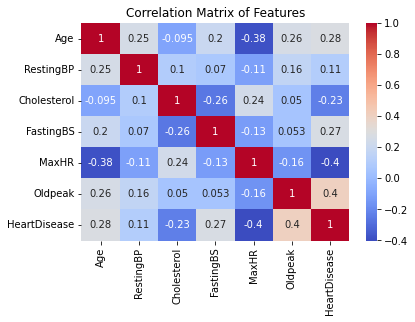

In [8]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

# Display box plots of the continuous features by target variable

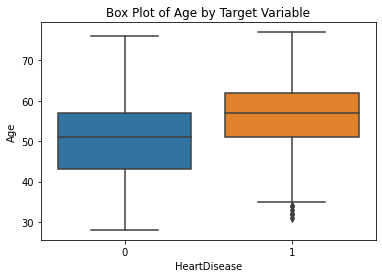

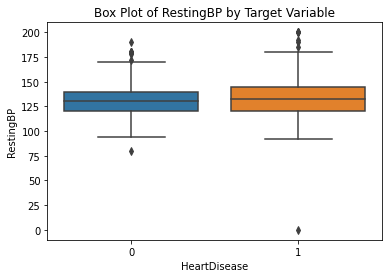

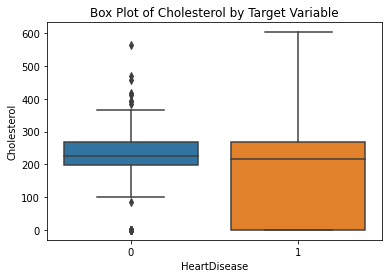

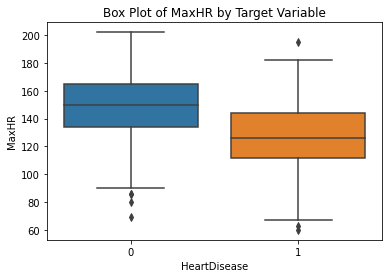

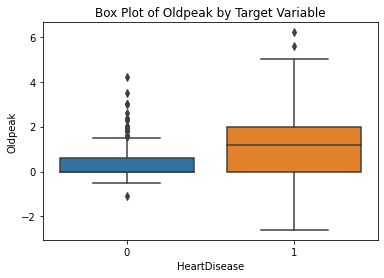

In [9]:
continuous_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for feature in continuous_features:
    sns.boxplot(x='HeartDisease', y=feature, data=df)
    plt.title("Box Plot of {} by Target Variable".format(feature))
    plt.show()

# Display histograms of the continuous features by target variable

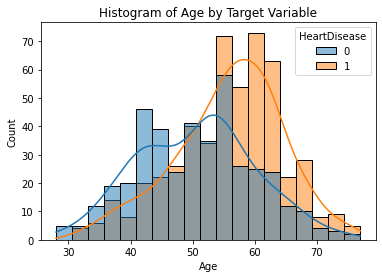

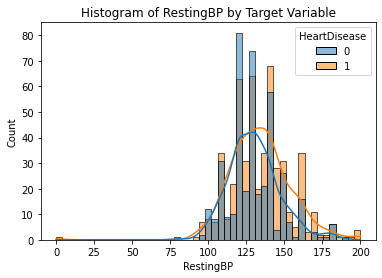

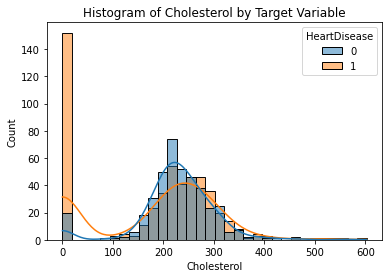

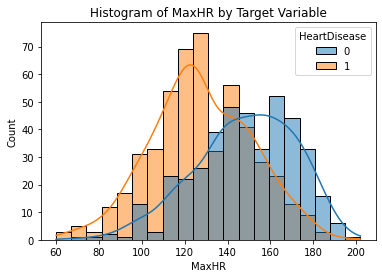

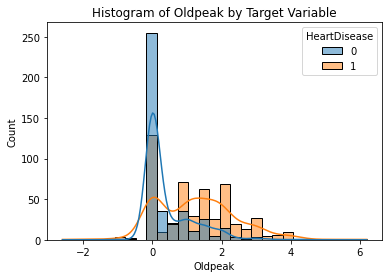

In [10]:
for feature in continuous_features:
    sns.histplot(x=feature, hue='HeartDisease', data=df, kde=True)
    plt.title("Histogram of {} by Target Variable".format(feature))
    plt.show()

# Display bar charts of the categorical features by target variable

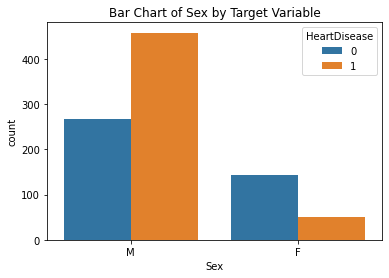

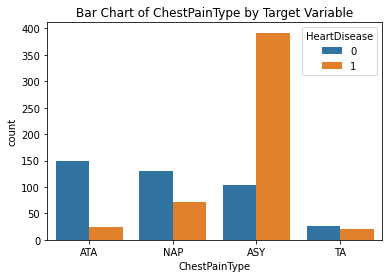

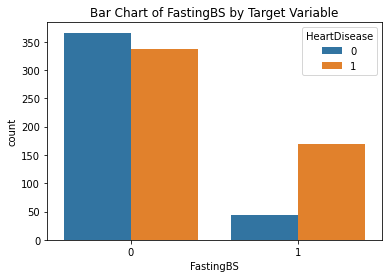

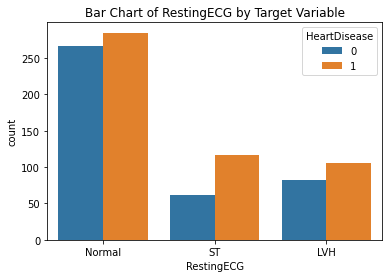

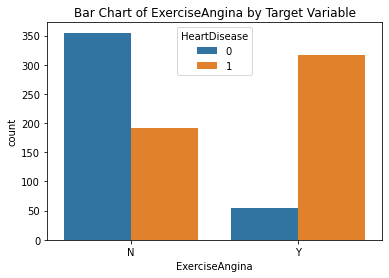

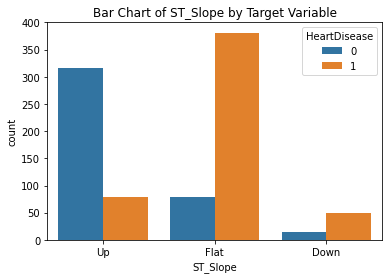

In [11]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for feature in categorical_features:
    sns.countplot(x=feature, hue='HeartDisease', data=df)
    plt.title("Bar Chart of {} by Target Variable".format(feature))
    plt.show()

**One Hot Encoding**

In [12]:
string_col = df.select_dtypes(include="object").columns

df=pd.get_dummies(df,columns=string_col,drop_first=False)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


# Split the dataset into features and target variable

In [13]:
y = df.HeartDisease.values
x_data = df.drop(['HeartDisease'],axis=1)
x_data.shape

(918, 20)

**Data Normalization**

In [14]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))
x.shape

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


(918, 20)

# Split the dataset into training and testing sets

Importing libraries that are required for applying our 
models

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


**Logistic Regression**

In [17]:
log_reg = LogisticRegression(max_iter=10000, C=0.1)

In [18]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [19]:
y_pred = log_reg.predict(X_test)

In [20]:
# Accuracy
print("Accuracy of Logistic Regression: {}\n".format(log_reg.score(X_test,y_test)))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix of loigistic regression:\n {}".format(cm))

Accuracy of Logistic Regression: 0.8532608695652174

Confusion matrix of loigistic regression:
 [[67 10]
 [17 90]]


**Decision Trees**

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [22]:
dtc = DecisionTreeClassifier()

In [23]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
# predict the target variable for the testing set
y_pred = dtc.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8097826086956522


**Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier()

In [27]:
params = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
}

In [28]:
# perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters and fit the model with them
best_params = grid_search.best_params_
rf_best = RandomForestClassifier(**best_params)
rf_best.fit(X_train, y_train)

# predict the target variable for the testing set
y_pred = rf_best.predict(X_test)

# calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8858695652173914


**SVM**

In [29]:
from sklearn.svm import SVC

In [30]:
svc = SVC()

In [31]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}

In [34]:
# Applying GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)

# Finding the best hyperparameters
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)

# Creating SVM classifier object with best hyperparameters
svc = SVC(**best_params)

# Fitting the model on the training data
svc.fit(X_train, y_train)

# Predicting the target variable for test data
y_pred = svc.predict(X_test)

# Calculating the accuracy score and classification report
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Best hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.8532608695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



**KNN**

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

In [37]:
knn = KNeighborsClassifier()


In [38]:
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [39]:
# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Train the KNN model with the best hyperparameters
knn = KNeighborsClassifier(**grid_search.best_params_)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Accuracy: 0.842391304347826


**Naive Bayes Classifier**

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb = GaussianNB()

In [42]:
params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

In [43]:
grid_search = GridSearchCV(estimator=nb, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

In [45]:
# Print the best parameters found
print("Best parameters: ", grid_search.best_params_)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

#print Accurary
print("Accuracy score:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

Best parameters:  {'var_smoothing': 1e-09}
Accuracy score: 0.8641304347826086
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        77
           1       0.93      0.83      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



**Neural Networks**

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [53]:
def create_model(neurons=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create a KerasClassifier wrapper for the scikit-learn API
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-53-336312613cec>:9: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [54]:
# Define the hyperparameter grid
param_grid = {'neurons': [8, 16, 32, 64], 'batch_size': [16, 32, 64], 'epochs': [50, 100, 200]}

In [55]:
# Perform a grid search to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

In [56]:
# Print the best hyperparameters and accuracy score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Evaluate the model on the testing set
y_pred = grid.predict(X_test)
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Best: 0.866434 using {'batch_size': 64, 'epochs': 200, 'neurons': 16}
6/6 [==============================] - 0s 3ms/step
Accuracy: 0.5044305293005671
